# Wall Clock Runtime Comparison of Algorithms

<font color=red>***This code visually illustrates how runtime changes as number of bills (input size) increases for our 4 implementations of 3 algorithms (linear search, binary search, 2 implementations of parse trees).  We are going to measure actual runtimes using the `timeit` module.  The bill files that we are going to use in this exercise are sorted so that we can use binary search.***
https://docs.python.org/3.8/library/timeit.html

In [1]:
import timeit, numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.optimize import curve_fit

In [2]:
def format_plot():
    plt.xlabel("n = Number of Bills/Size of Input", fontsize=44, fontweight='bold')
    plt.ylabel("r = Runtime (s)", fontsize=44, fontweight='bold')
    ax = plt.gca()
    ax.xaxis.labelpad = 50
    ax.yaxis.labelpad = 50
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(loc='upper left', fontsize=18)

<font color=red>***These are the Python statements that we are going to time:***

In [3]:
stmt1 = "wl.linear_search(key)"
stmt2 = "wl.binary_search(key)"

<font color=red>***Let's make some lists to store the runtimes in and an array that holds the number of bills in each of the bill files that we load into a `WatchList` to search.  Afterwards we will plot our results to visually compare the efficiency of linear search vs. binary search.***

In [5]:
linear = []
binary = []

x = np.array([50, 500, 1000, 2000, 4000, 6000, 8000, 10000])

In [6]:
for i in x:
    setup = ("import hw1\n" +
             "wl = hw1.WatchList('bills_d100_" + repr(i) + ".txt')\n" +
             "key = 'AA000000000A 100'")
    t = timeit.Timer(stmt=stmt1, setup=setup)
    linear.append(min(t.repeat(number=1000)))
    t = timeit.Timer(stmt=stmt2, setup=setup)
    binary.append(min(t.repeat(number=1000)))
    

<font color=red>***Each call to `repeat` will time 1000 executions of the statement in seconds.  This will 5 repeat times.  We want the minimum of the 5 times rather than mean or something. <font color=blue>Why?***

In [7]:
linear


[0.0008018000003175985,
 0.004715000000032887,
 0.009002300000247487,
 0.017623600000206352,
 0.03513409999959549,
 0.0533674999996947,
 0.07006730000011885,
 0.08760019999999713]

In [8]:
binary

[0.0011830000003101304,
 0.0016402999999627355,
 0.0018047999997179431,
 0.0019919999999729043,
 0.00218959999983781,
 0.0036458999998103536,
 0.002359800000249379,
 0.003962799999953859]

(0, 0.1)

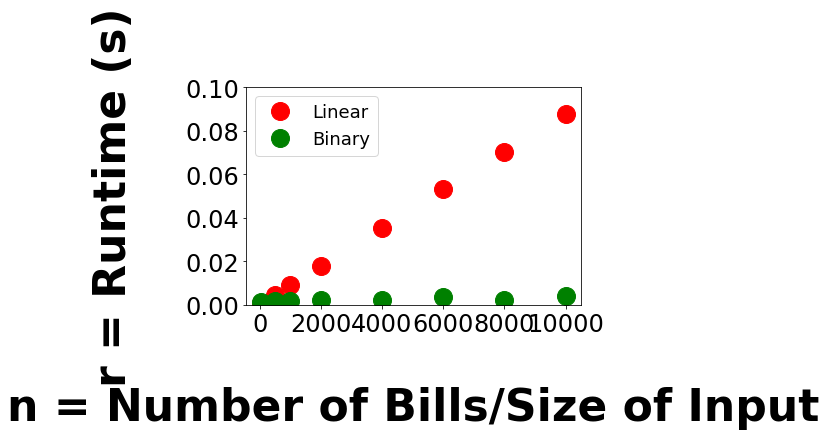

In [10]:
y = np.array(linear)
plt.plot(x, y, 'ro', markersize=18, label='Linear')
y = np.array(binary)
plt.plot(x, y, 'go', markersize=18, label='Binary')
format_plot()
ax = plt.gca()
ax.set_ylim(0, 0.1)

<font color=red>***Binary search just crushed linear. <font color=blue>But what's the hidden cost of binary search?***

<font color=red>***Binary is so small compared to linear that we can't really see what shape it is.  Let's look at it by itself:***

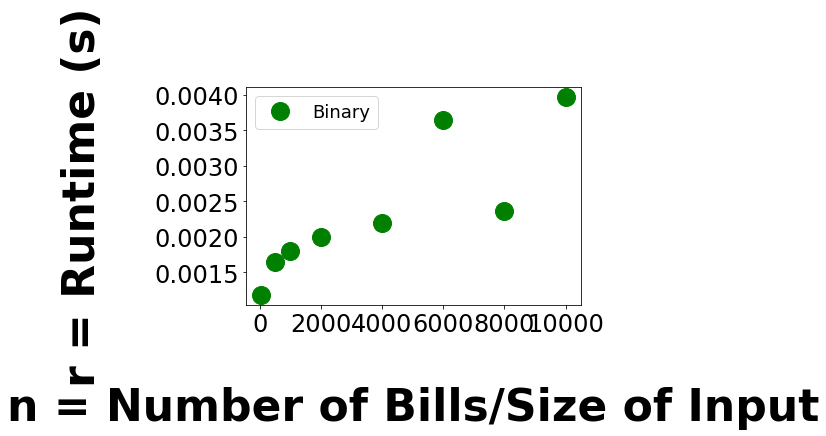

In [11]:
y = np.array(binary)
plt.plot(x, y, 'go', markersize=18, label='Binary')
format_plot()


<font color=red>***Let's fit a line to the linear results:***

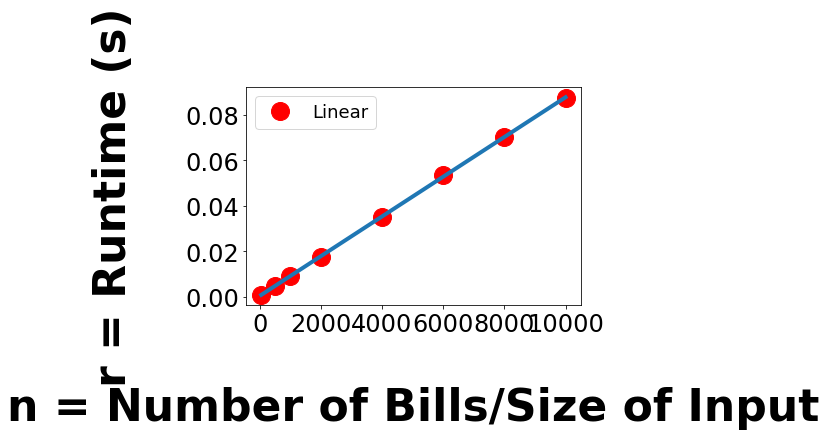

In [12]:
y = np.array(linear)
plt.plot(x, y, 'ro', markersize=18, label='Linear')
X = sm.add_constant(x)
model = sm.OLS(y, X)
line = model.fit()
y = line.params[1] * x + line.params[0]
plt.plot(x, y, linewidth=4)
format_plot()

<font color=red>***That looks like it's maybe a log curve.  Let's fit one of those to it:***

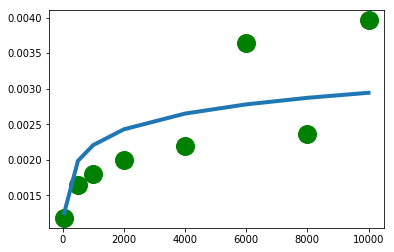

In [13]:
y = np.array(binary)
plt.plot(x, y, 'go', markersize=18, label='Binary')
f = lambda x, a: a * np.log2(x)
popt, pcov = curve_fit(f, x, y)
y = f(x, *popt)
plt.plot(x, y, linewidth=4)

In [14]:
popt

array([0.00022148])

<font color=blue>***What is the equation of this curve?***

<font color=red>***Why did I use $log_2$?  Let's draw a tree of the operations we  need to do a binary search.  We will consider one operation to be splitting a section of the sequence and checking to see if we have found the target.  Obviously this is more than one Python instruction and many more than one machine level instruction, but the runtime will be directly proportional to the number of these operations, so we will use this definition to analyze our problem.***

$$r = runtime = number\; of\; ops = tree\; height + 1 = h + 1$$
$$n = number\; of\; bills = input\; size = len(list\; of\; bills) = number\; of\; leaves$$
$$n = 2^r$$
$$r = log_2(n)$$<br>

***Another way to think of it is every time we add an operation, we double the number of items we can search.  Put a pen to paper and see that again, $n = 2^r$.***

In [15]:
stmt3 = "wll.search(sn, denom)"
stmt4 = "wld.search(sn, denom)"
binary = []
ptl = [] # Linked parse tree
ptd = [] # Nested dictionary parse tree
x = np.array([50, 500, 1000, 2000, 4000, 6000, 8000, 10000, 20000, 
              30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])
for i in x:
    setup = ("import hw1\n" +
             "wl = hw1.WatchList('bills_d100_" + repr(i) + ".txt')\n" +
             "key = 'AA000000000A 100'")
    setup2 = ("import hw2\n" +
             "wll = hw2.WatchListLinked('bills_d100_" + repr(i) + ".txt')\n" +
             "sn = 'AA000000000A 100'\n" +
             "denom = '100'")
    setup3 = ("import hw2\n" +
             "wld = hw2.WatchListDict('bills_d100_" + repr(i) + ".txt')\n" +
             "sn = 'AA000000000A 100'\n" +
             "denom = '100'")
    t = timeit.Timer(stmt=stmt2, setup=setup)
    binary.append(min(t.repeat(number=1000)))
    t = timeit.Timer(stmt=stmt3, setup=setup2)
    ptl.append(min(t.repeat(number=1000)))
    t = timeit.Timer(stmt=stmt4, setup=setup3)
    ptd.append(min(t.repeat(number=1000)))

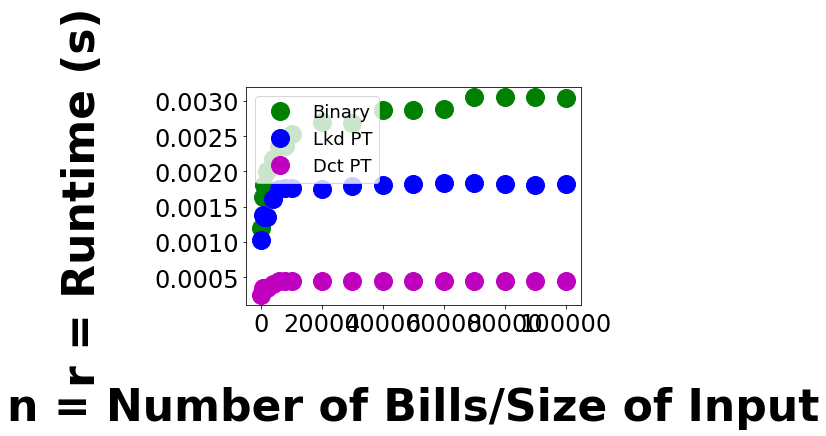

In [16]:
y = np.array(binary)
plt.plot(x, y, 'go', markersize=18, label='Binary')
y = np.array(ptl)
plt.plot(x, y, 'bo', markersize=18, label='Lkd PT')
y = np.array(ptd)
plt.plot(x, y, 'mo', markersize=18, label='Dct PT')
format_plot()

<font color=blue>***What do you think of the stepwise nature of the binary curve? <font color=red>`matplotlib` must be rounding.***

In [17]:
x = np.linspace(1, 20000, 100)
y = 100 * np.log2(x) + 100
y_linear = 0.1 * x - 100

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]), <a list of 10 Text yticklabel objects>)

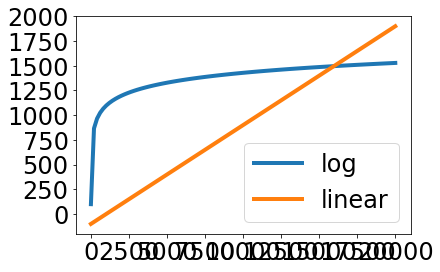

In [18]:
plt.plot(x, y, linewidth=4, label='log')
plt.plot(x, y_linear, linewidth=4, label='linear')
plt.legend(fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

In [19]:
y = np.log2(x)
y_poly = x**0.1

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text yticklabel objects>)

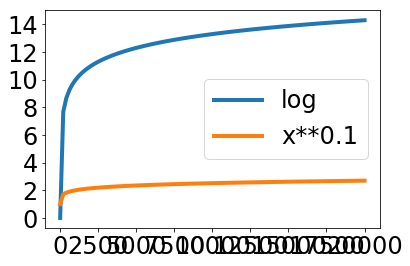

In [20]:
plt.plot(x, y, linewidth=4, label='log')
plt.plot(x, y_poly, linewidth=4, label='x**0.1')
plt.legend(fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)


In [21]:
n = 10
while np.log2(n) > n**0.1:
    print(n)
    n *= 10

10
100
1000
10000
100000
1000000
10000000
100000000
1000000000
10000000000
100000000000
1000000000000
10000000000000
100000000000000
1000000000000000
10000000000000000
100000000000000000


<font color=red>***You can see from what we did today how drastically different different algorithms that solve the same problem can be. How can we characterize these differences? We'll start answering that question next time.***